### 灰度图

In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

img=cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

In [2]:
cv2.imshow("img_gray", img_gray)
cv2.waitKey(0)    
cv2.destroyAllWindows() 

### HSV
- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

In [3]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

cv2.imshow("hsv", hsv)
cv2.waitKey(0)    
cv2.destroyAllWindows()

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转



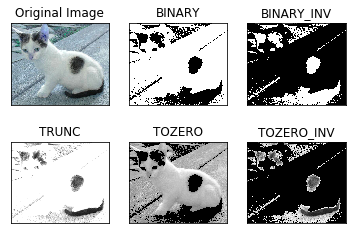

In [4]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 图像平滑

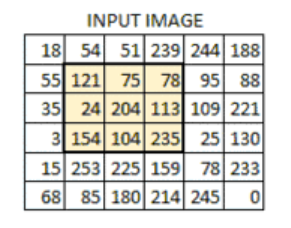

In [5]:
img = cv2.imread('lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)  

cv2.imshow('aussian', aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 展示所有的
res = np.hstack((blur,aussian,median))
#print (res)
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学-腐蚀操作

In [14]:
img = cv2.imread('dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
kernel = np.ones((3,3),np.uint8) 
erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
kernel = np.ones((30,30),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学-膨胀操作

In [18]:
img = cv2.imread('dige.png')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
kernel = np.ones((3,3),np.uint8) 
dige_erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
kernel = np.ones((3,3),np.uint8) 
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations = 1)

cv2.imshow('dilate', dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
pie = cv2.imread('pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 开运算与闭运算

In [22]:
# 开：先腐蚀，再膨胀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# 闭：先膨胀，再腐蚀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()



### 梯度运算

In [24]:
# 梯度=膨胀-腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)

res = np.hstack((dilate,erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算-原始输入

In [26]:
#礼帽
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
#黑帽
img = cv2.imread('dige.png')
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat ', blackhat )
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图像梯度-Sobel算子

![title](sobel_1.png)

In [31]:
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小


In [29]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [32]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

cv_show(sobelx,'sobelx')

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

In [33]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')

In [34]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)  
cv_show(sobely,'sobely')

分别计算x和y，再求和

In [35]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

不建议直接计算

In [36]:
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

In [37]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [38]:
#分开计算效果好些，不建议一起计算
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

### 图像梯度-Scharr算子

![title](scharr.png)

### 图像梯度-laplacian算子

![title](l.png)

In [39]:
#不同算子的差异
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

In [40]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

#### 1:高斯滤波器

![title](canny_1.png)

#### 2:梯度和方向

![title](canny_2.png)

#### 3：非极大值抑制

![title](canny_3.png)

![title](canny_6.png)

#### 4：双阈值检测

![title](canny_5.png)

In [42]:
img=cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,80,150)     #80，150为minval，maxval
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')


In [43]:
img=cv2.imread("car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,120,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')

### 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

![title](Pyramid_1.png)

#### 高斯金字塔：向下采样方法（缩小）

![title](Pyramid_2.png)

#### 高斯金字塔：向上采样方法（放大）

![title](Pyramid_3.png)

In [44]:
img=cv2.imread("AM.png")
cv_show(img,'img')
print (img.shape)

(442, 340, 3)


In [45]:
up=cv2.pyrUp(img)
cv_show(up,'up')
print (up.shape)

(884, 680, 3)


In [46]:
down=cv2.pyrDown(img)
cv_show(down,'down')
print (down.shape)

(221, 170, 3)


In [47]:
up2=cv2.pyrUp(up)
cv_show(up2,'up2')
print (up2.shape)

(1768, 1360, 3)


In [48]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(up_down,'up_down')

In [49]:
cv_show(np.hstack((img,up_down)),'up_down')

In [50]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(img-up_down,'img-up_down')

#### 拉普拉斯金字塔

![title](Pyramid_4.png)

In [51]:
down=cv2.pyrDown(img)
down_up=cv2.pyrUp(down)
l_1=img-down_up
cv_show(l_1,'l_1')

### 图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](chain.png)

为了更高的准确率，使用二值图像。

In [52]:
img = cv2.imread('contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(thresh,'thresh')

In [53]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

绘制轮廓

In [54]:
cv_show(img,'img')

In [55]:
#传入绘制图像，轮廓，轮廓索引(默认-1全部)，颜色模式，线条厚度
# 注意需要copy,要不原图会变。。。
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
cv_show(res,'res')

In [56]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)
cv_show(res,'res')

#### 轮廓特征

In [57]:
cnt = contours[0]

In [58]:
#面积
cv2.contourArea(cnt)

8500.5

In [49]:
#周长，True表示闭合的
cv2.arcLength(cnt,True)

437.9482651948929

#### 轮廓近似

![title](contours3.png)

In [53]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show(res,'res')

In [55]:
epsilon = 0.01*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res,'res')

边界矩形

In [57]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv_show(img,'img')

In [58]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


外接圆

In [59]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)
cv_show(img,'img')

### 傅里叶变换

我们生活在时间的世界中，早上7:00起来吃早饭，8:00去挤地铁，9:00开始上班。。。以时间为参照就是时域分析。

但是在频域中一切都是静止的！

https://zhuanlan.zhihu.com/p/19763358


### 傅里叶变换的作用

- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

### 滤波

- 低通滤波器：只保留低频，会使得图像模糊

- 高通滤波器：只保留高频，会使得图像细节增强



- opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换成np.float32 格式。
- 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现。
- cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能展示（0,255）。

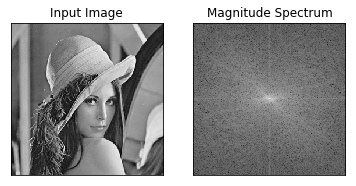

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

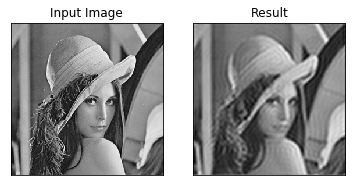

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()                

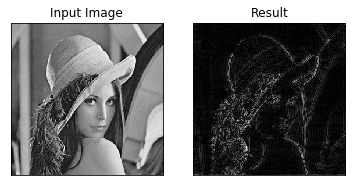

In [62]:
img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()    